# NetworkSet


## Introduction



The [NetworkSet](../api/networkSet.rst) object represents an unordered  set of networks. It 
provides  methods iterating and slicing the set, sorting by datetime, calculating statistical quantities, and displaying uncertainty bounds on plots. 

## Creating a [NetworkSet](../api/networkSet.rst)

Lets take a look in the `data/` folder, there are some redundant measurements of a network called `ro`,  which is a *radiating open* waveguide. 

In [1]:
ls data/ro*

data/ro,1.s1p  data/ro,2.s1p  data/ro,3.s1p


The files `ro,1.s1p` , `ro,2.s1p`, ...  are redundant measurements on 
which we would like to calculate statistics using the [NetworkSet](../api/networkSet.rst)
class.

A [NetworkSet](../api/networkSet.rst) is created from a list or dict of 
[Network](../api/network.rst)'s. So first we need to load all of the 
touchstone files into `Networks`. This can be done quickly with 
`rf.read_all`,  The argument `contains` is used to load only files 
which match a given substring. 

In [2]:
import skrf as rf

rf.read_all(rf.data.pwd, contains='ro')

{'ro,1': 1-Port Network: 'ro,1',  500-750 GHz, 201 pts, z0=[ 50.+0.j],
 'ro,2': 1-Port Network: 'ro,2',  500-750 GHz, 201 pts, z0=[ 50.+0.j],
 'ro,3': 1-Port Network: 'ro,3',  500-750 GHz, 201 pts, z0=[ 50.+0.j]}

This can be passed directly to the [NetworkSet](../api/networkSet.rst) constructor, 

In [3]:
from skrf import NetworkSet 

ro_dict = rf.read_all(rf.data.pwd, contains='ro')
ro_ns = NetworkSet(ro_dict, name='ro set') 
ro_ns

A NetworkSet of length 3

A NetworkSet can also be constructed directly from a dir with `NetworkSet.from_dir()` or from a zipfile of touchstones through the class method `NetworkSet.from_zip()`.

## Accesing Network Methods 


The [Network](../api/network.rst) elements in a [NetworkSet](../api/networkSet.rst) can be accessed like the elements of list, 

In [6]:
ro_ns[0]

1-Port Network: 'ro,3',  500-750 GHz, 201 pts, z0=[ 50.+0.j]

Most [Network](../api/network.rst) methods are also methods of 
[NetworkSet](../api/networkSet.rst). These methods are called on each 
[Network](../api/network.rst) element individually. For example to 
plot the log-magnitude of the s-parameters of each Network.

/home/alex/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


[None, None, None]

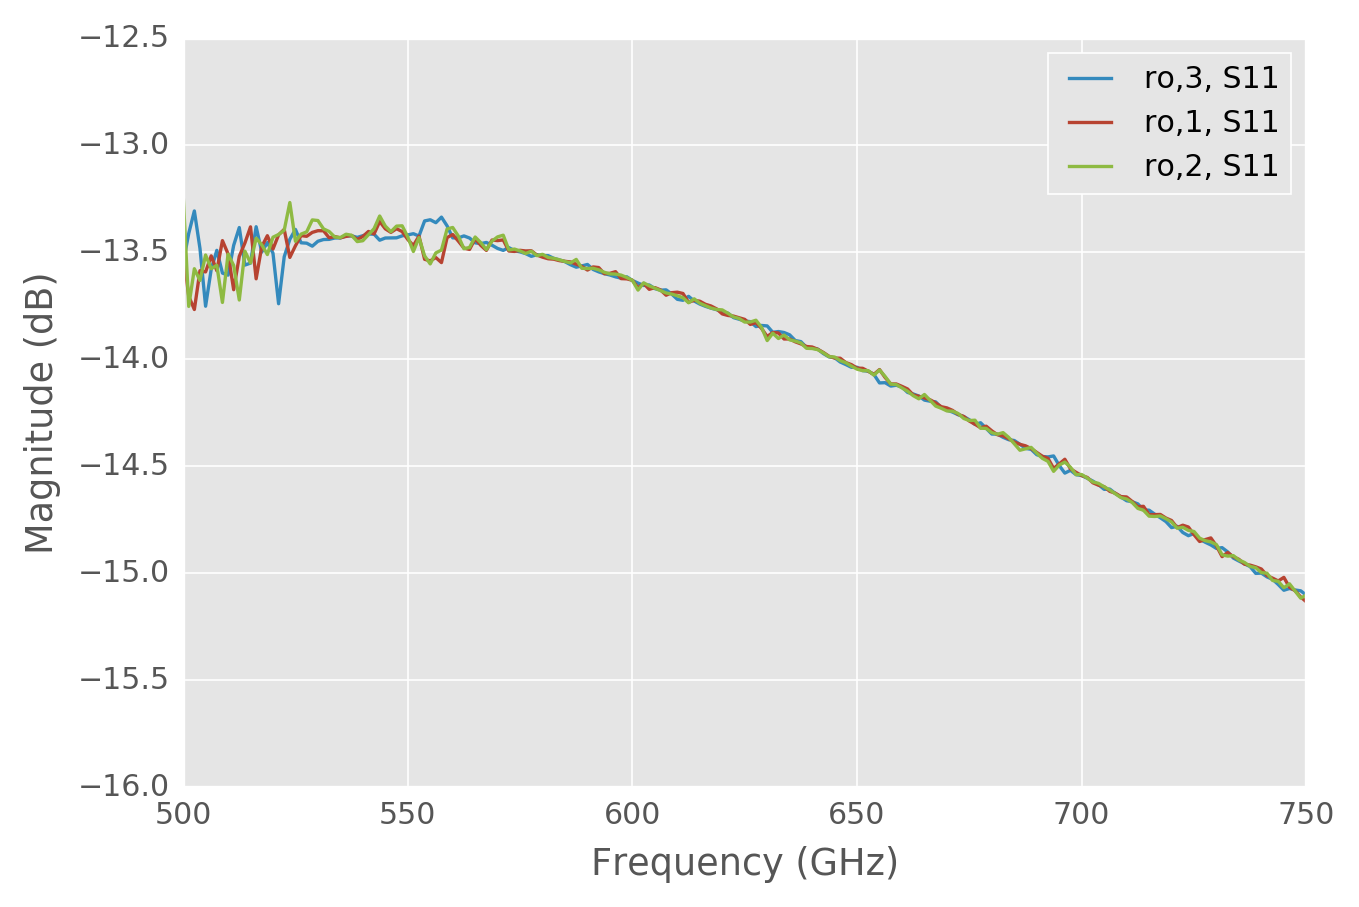

In [11]:
rf.setup_pylab()
rf.stylely()

ro_ns.plot_s_db()

## Statistical Properties


Statistical quantities can be calculated by accessing 
properties of the NetworkSet. To calculate the complex 
average of the set, access the `mean_s` property

In [13]:
ro_ns.mean_s

1-Port Network: 'ro set',  500-750 GHz, 201 pts, z0=[ 50.+0.j]

    
The naming convention of the statistical operator properties are `NetworkSet.{function}_{parameter}`, where `function` is the name of the 
statistical function, and `parameter` is the Network parameter to operate 
on. These methods return a [Network](../api/network.rst) object, so they can be 
saved or plotted in the same way as you would with a Network.
To plot the log-magnitude of the complex mean response 

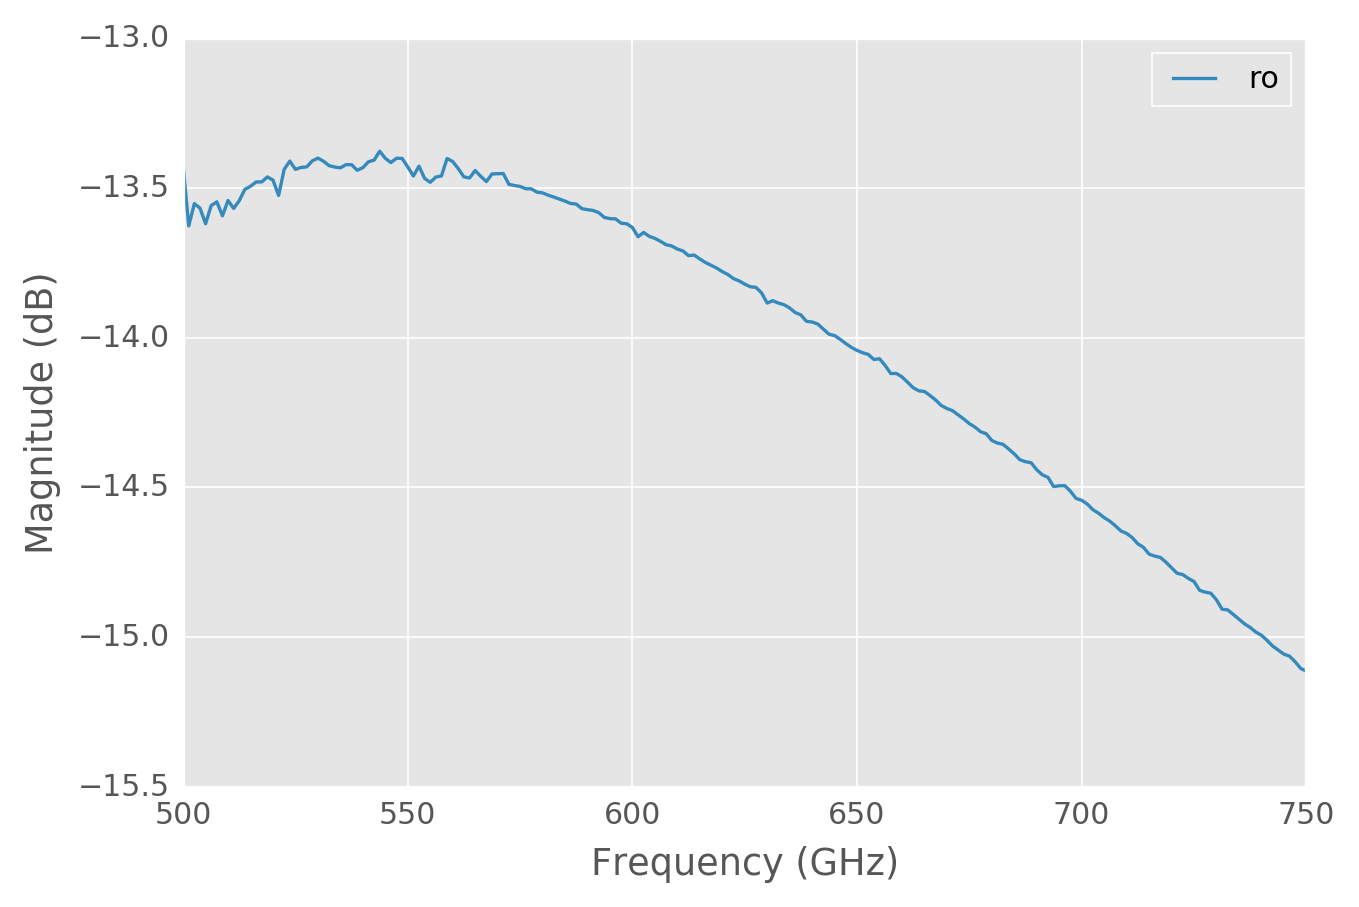

In [14]:
ro_ns.mean_s.plot_s_db(label='ro')

Or to plot the standard deviation of the complex s-parameters,

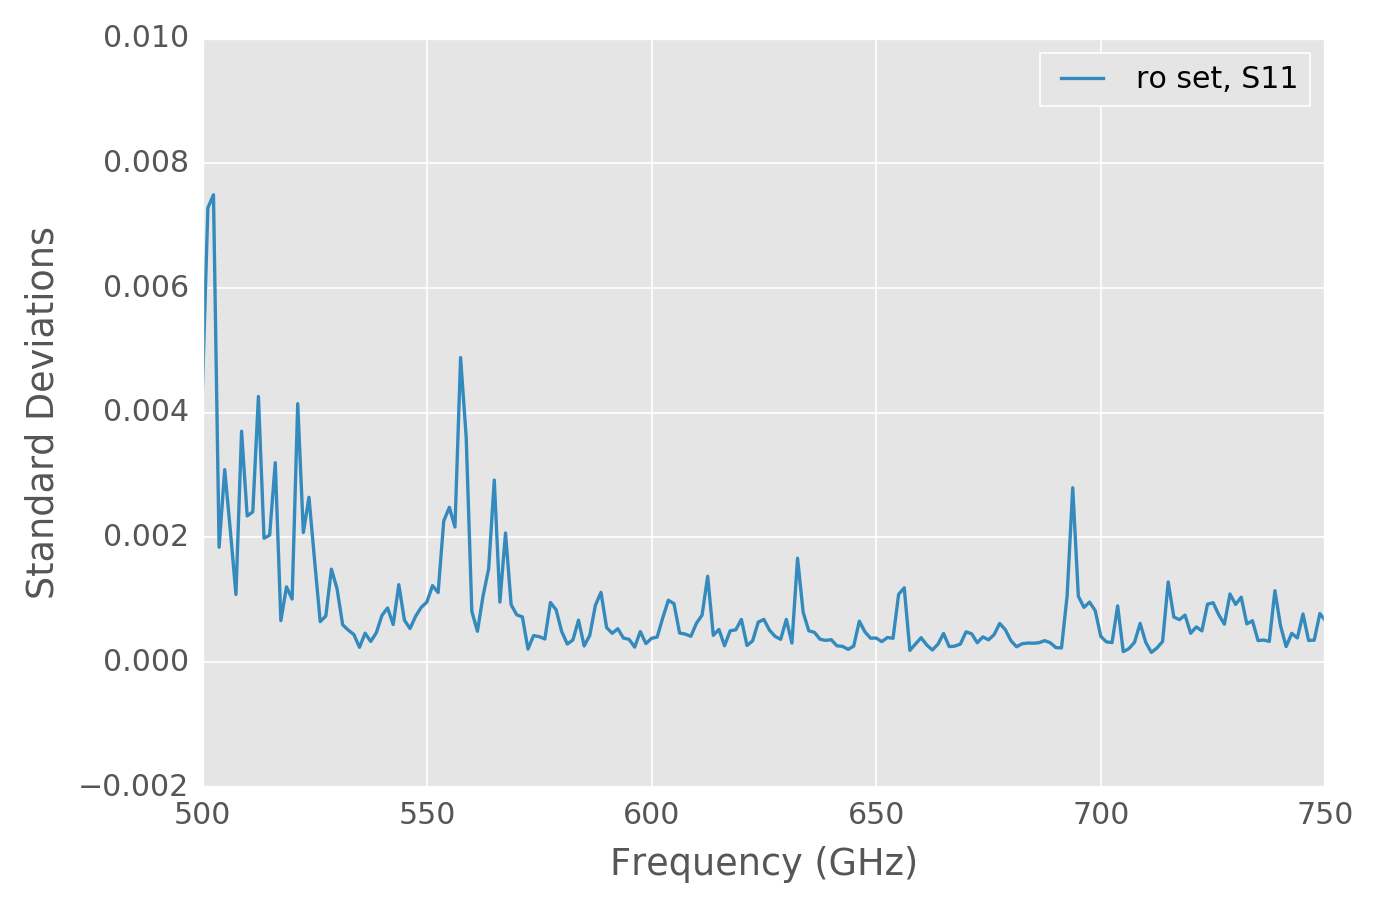

In [15]:
ro_ns.std_s.plot_s_re(y_label='Standard Deviations')

Using these properties it is possible to calculate statistical quantities on the scalar 
components of the complex network parameters. To calculate the 
mean of the phase component,

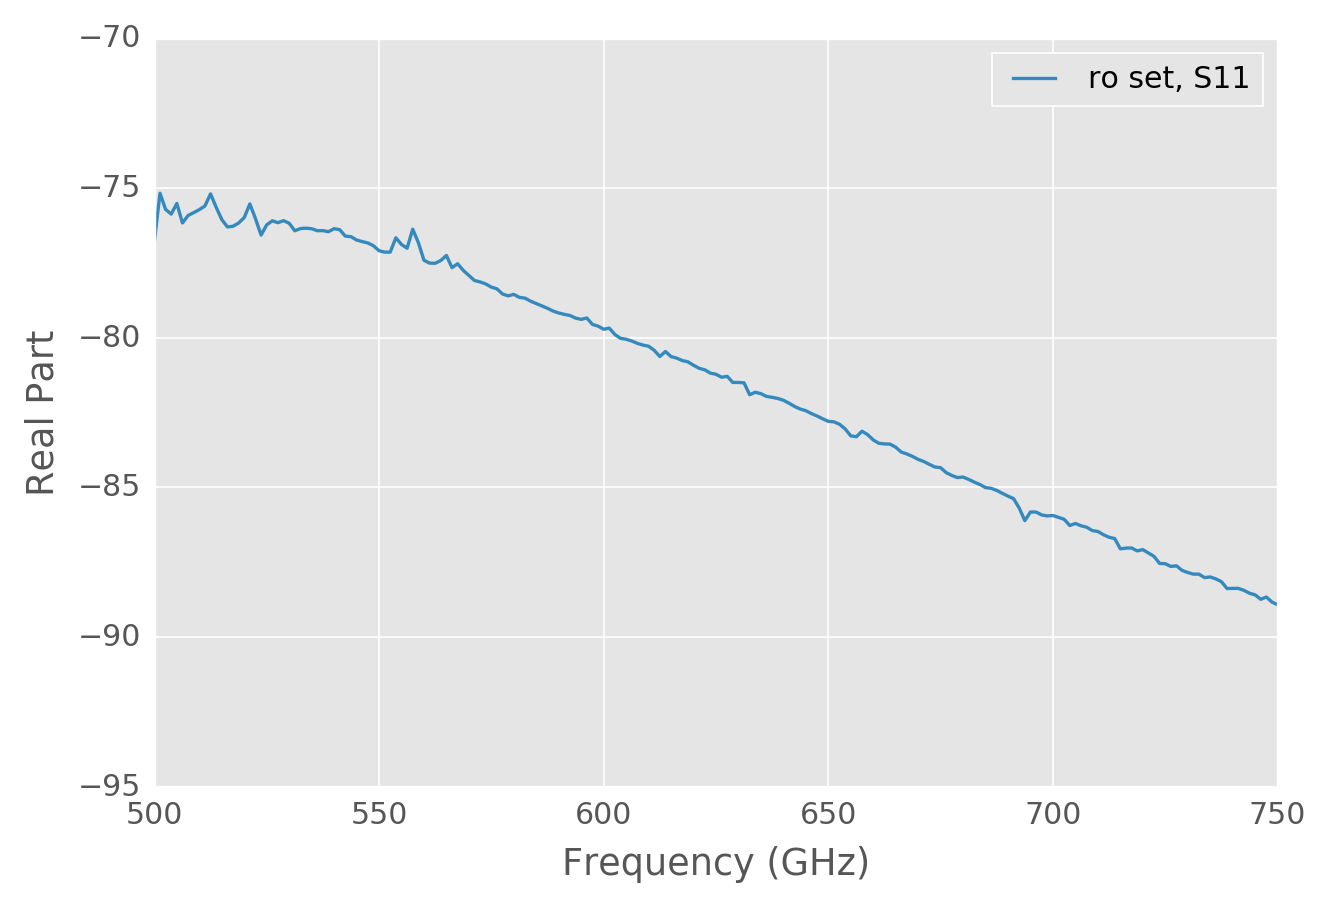

In [16]:
ro_ns.mean_s_deg.plot_s_re()    

## Plotting Uncertainty Bounds


Uncertainty bounds can be plotted through the methods 

/home/alex/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:4670: ComplexWarning: Casting complex values to real discards the imaginary part
  X[0] = start
/home/alex/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:4671: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 1] = end
/home/alex/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:4674: ComplexWarning: Casting complex values to real discards the imaginary part
  X[1:N + 1, 1] = y1slice
/home/alex/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:4676: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 2:, 1] = y2slice[::-1]
/home/alex/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


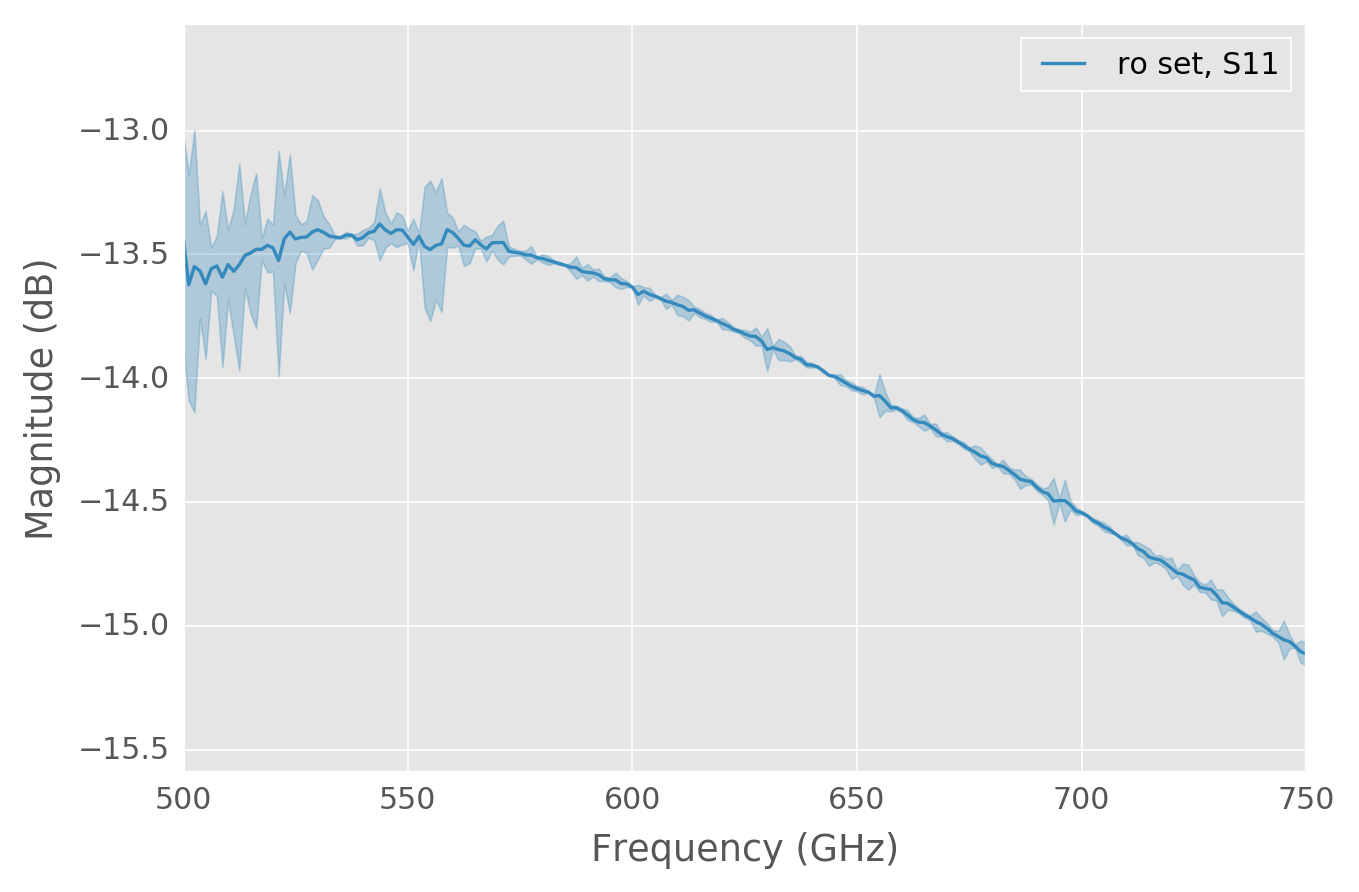

In [17]:
ro_ns.plot_uncertainty_bounds_s_db()

/home/alex/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:4670: ComplexWarning: Casting complex values to real discards the imaginary part
  X[0] = start
/home/alex/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:4671: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 1] = end
/home/alex/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:4674: ComplexWarning: Casting complex values to real discards the imaginary part
  X[1:N + 1, 1] = y1slice
/home/alex/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:4676: ComplexWarning: Casting complex values to real discards the imaginary part
  X[N + 2:, 1] = y2slice[::-1]
/home/alex/anaconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


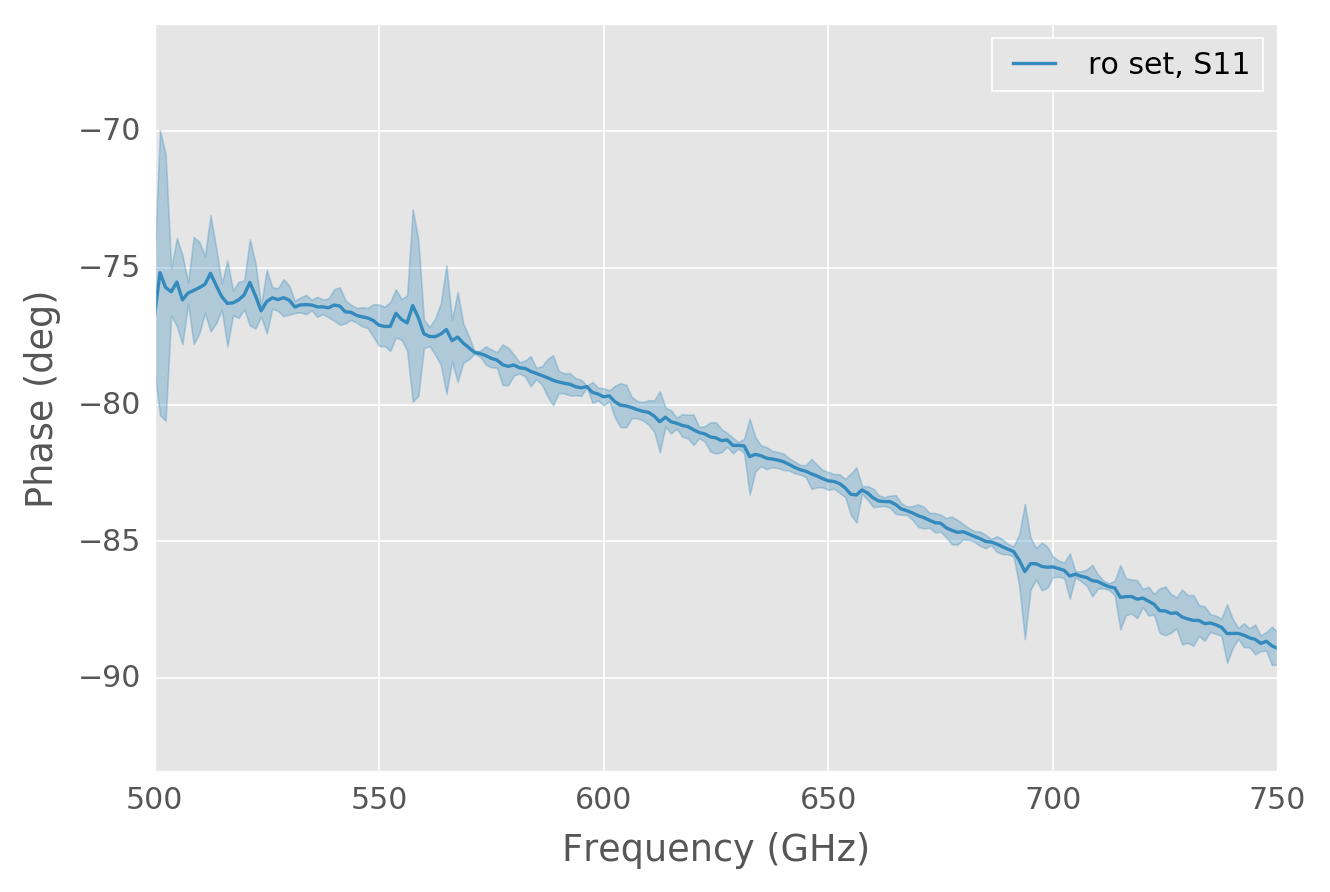

In [18]:
ro_ns.plot_uncertainty_bounds_s_deg()


## Reading and Writing

To write all [Network](../api/network.rst)s of a [NetworkSet](../api/networkSet.rst) out to individual touchstones,

In [26]:
ro_ns.write_touchstone(dir='data/')

[None, None, None]

For temporary data storage, [NetworkSet](../api/networkSet.rst)s can be saved and read from disk 
using  the functions `rf.read` and `rf.write`

    

In [27]:
rf.write('ro set.ns', ro_ns)

In [28]:
ro_ns = rf.read('ro set.ns')
ro_ns

A NetworkSet of length 3

## Export to Excel, csv, or html

[NetworkSet](../api/networkSet.rst)s can also be exported to other filetypes. The format of the output; real/imag, mag/phase is adjustable, as is the output type; csv, excel, html. For example to export mag/phase for each network into an Excel spreadsheet for your boss[s]

In [30]:
ro_ns.write_spreadsheet('data/ro_spreadsheet.xls', form='db')

More info on this can be found in the function, `skrf.io.general.network_2_spreadsheet`